In [1]:
# Benchmark: GPT-2 vs LSTM for Next Word Prediction

from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()

def gpt2_predict_next_word(prompt, top_k=3):
    inputs = tokenizer(prompt, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    next_token_logits = logits[0, -1, :]
    top_k_ids = torch.topk(next_token_logits, k=top_k).indices.tolist()
    return [(tokenizer.decode([idx]).strip(), next_token_logits[idx].item()) for idx in top_k_ids]

# Example usage
prompt = "To be or not to"
predictions = gpt2_predict_next_word(prompt)
print(f"Prompt: {prompt}")
print("GPT-2 Predictions:")
for word, score in predictions:
    print(f"{word} (score: {score:.4f})")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\ProgramData\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dhanu\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Prompt: To be or not to
GPT-2 Predictions:
be (score: -45.7280)
have (score: -51.0906)
become (score: -51.2424)


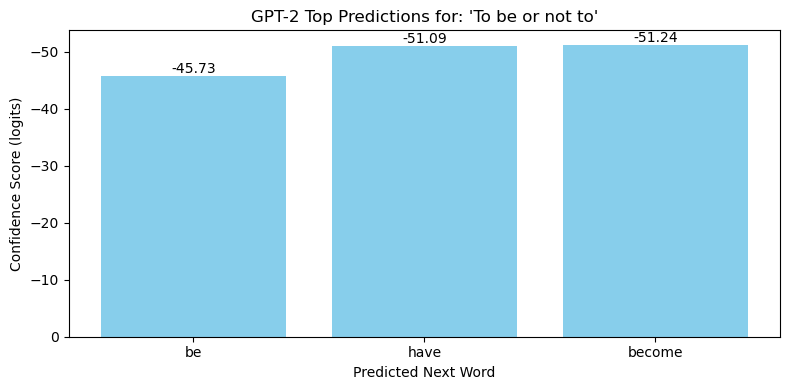

In [2]:
import matplotlib.pyplot as plt

# Extract words and their scores
words = [word for word, score in predictions]
scores = [score for word, score in predictions]

# Plot
plt.figure(figsize=(8, 4))
bars = plt.bar(words, scores, color='skyblue')
plt.title(f"GPT-2 Top Predictions for: '{prompt}'")
plt.xlabel("Predicted Next Word")
plt.ylabel("Confidence Score (logits)")
plt.gca().invert_yaxis()  # Optional: flip y-axis so highest score is at the top

# Add exact scores on bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{score:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load LSTM model and tokenizer
lstm_model = load_model(r'C:\Users\Dhanu\Documents\Project\Next_Word_Predictor\Models\next_word_lstm.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_lstm = pickle.load(handle)

# Function for LSTM prediction
def lstm_predict_next_word(prompt, top_k=3):
    seq = tokenizer_lstm.texts_to_sequences([prompt])[0]
    padded = pad_sequences([seq], maxlen=5, padding='pre')  # adjust if needed
    preds = lstm_model.predict(padded, verbose=0)[0]
    top_indices = np.argsort(preds)[-top_k:][::-1]
    words = [word for word, index in tokenizer_lstm.word_index.items() if index in top_indices]
    scores = preds[top_indices]
    return list(zip(words, scores))

# Function for GPT-2 prediction
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained("gpt2")
model_gpt2 = GPT2LMHeadModel.from_pretrained("gpt2")
model_gpt2.eval()

def gpt2_predict_next_word(prompt, top_k=3):
    inputs = tokenizer_gpt2(prompt, return_tensors="pt")
    with torch.no_grad():
        outputs = model_gpt2(**inputs)
        logits = outputs.logits
    next_token_logits = logits[0, -1, :]
    top_k_ids = torch.topk(next_token_logits, k=top_k).indices.tolist()
    return [(tokenizer_gpt2.decode([idx]).strip(), next_token_logits[idx].item()) for idx in top_k_ids]

# Compare both
prompt = "To be or not to"
gpt2_preds = gpt2_predict_next_word(prompt, top_k=3)
lstm_preds = lstm_predict_next_word(prompt, top_k=3)

# Print comparison
print(f"\nPrompt: '{prompt}'\n")
print("GPT-2 Predictions:")
for word, score in gpt2_preds:
    print(f"{word:<10} (score: {score:.4f})")

print("\nLSTM Predictions:")
for word, score in lstm_preds:
    print(f"{word:<10} (score: {score:.4f})")

# 📊 Visualization
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# GPT-2
gpt2_words, gpt2_scores = zip(*gpt2_preds)
axs[0].bar(gpt2_words, gpt2_scores, color='skyblue')
axs[0].set_title("GPT-2 Predictions")
axs[0].set_ylabel("Score (logit)")
axs[0].invert_yaxis()

# LSTM
lstm_words, lstm_scores = zip(*lstm_preds)
axs[1].bar(lstm_words, lstm_scores, color='lightgreen')
axs[1].set_title("LSTM Predictions")
axs[1].set_ylabel("Score (probability)")

fig.suptitle(f"Next Word Prediction for: '{prompt}'")
plt.tight_layout()
plt.show()


OSError: No file or directory found at Models/next_word_model.h5